In [1]:
# machine 29
# buiani marco

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.metrics import confusion_matrix, accuracy_score
from max_diag import max_diag

from sklearn.preprocessing import MinMaxScaler

rnd_state = 42

### 1.  Data is readed and explored
We begin by reading the whole dataset into a Pandas Dataframe.  
To check for proper import the head is shown.

In [3]:
data_file = 'seeds_dataset.txt'
df = pd.read_csv(data_file,delimiter='\t',header = None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


The dataset is then split in X and y, attributes and class label respectively.

In [4]:
X = df.drop(7,axis = 1)
y = df[7]
print('X has shape {}, y has shape {}'.format(X.shape,y.shape))

X has shape (210, 7), y has shape (210,)


A pairplot of the attributes is produced using the seaborn method.

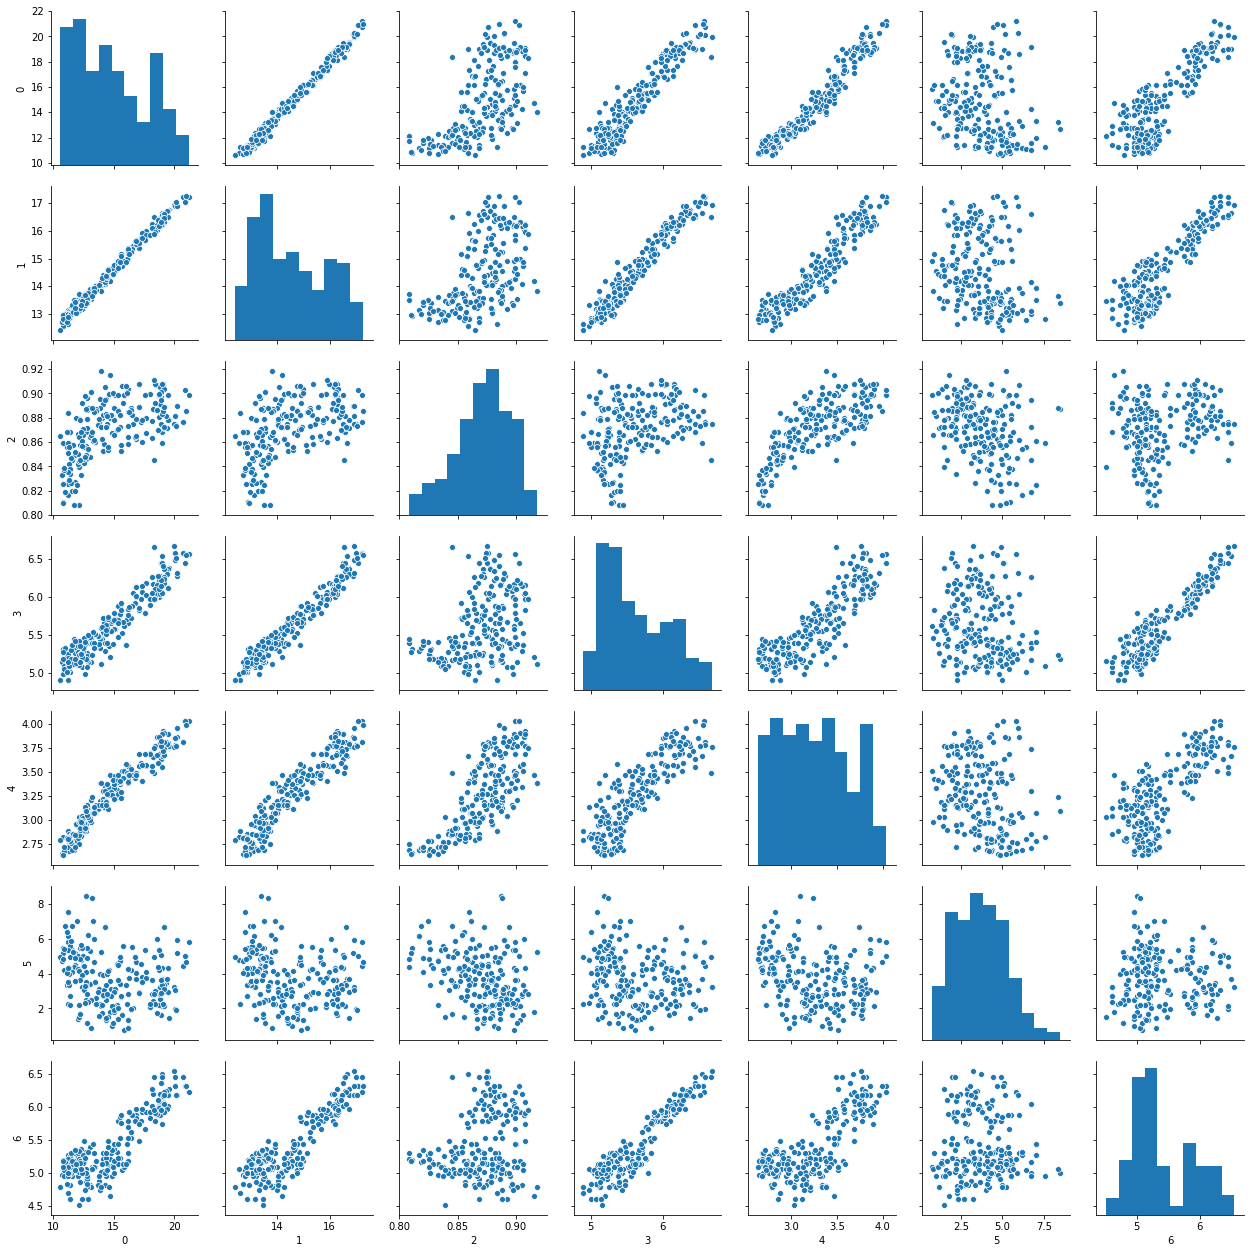

In [5]:
sns.pairplot(data = X);

In the attribute pairs with attribute 6 the data looks more separable,
4-6 pair is choosen because the supposed clusters look isotropic.  
This will be valuable for some clustering schemes.

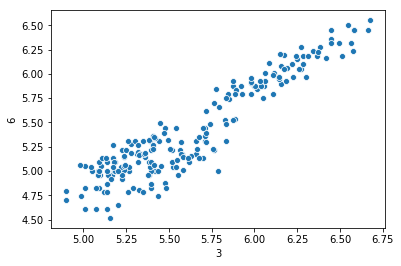

In [6]:
sns.scatterplot(df[3],df[6]);

### 2. KMeans method is chosen, we explore a range of Ks
I chose to implement a KMeans clustering schema as data does not seem to show concavities in the supposed clusters.   
It is also the preferred method if one wants to plot global distortions, as they arecomputed by the schema itself.

I setup a k_range iterable with the number of clusters to test the algorithm with.
I will then store distortions and silhouette global scores for best parameter pick.


In [7]:
n_cluster_range = range(2,10)
distortions = []
silhouette_scores = []

for n_clust in n_cluster_range:

    estimator = KMeans(n_clusters = n_clust,random_state = rnd_state)
    estimator.fit_predict(X)
    
    y_km = estimator.labels_
    distortion = estimator.inertia_
    silhouette = silhouette_score(X,y_km)
    
    distortions.append(distortion)
    silhouette_scores.append(silhouette)


The two values are arranged in a single plot figure.

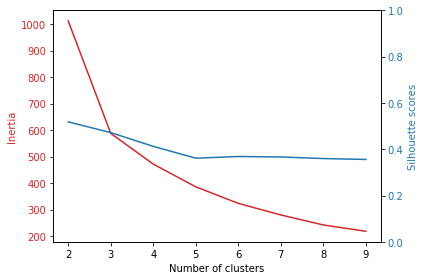

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(n_cluster_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(n_cluster_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The plot interpretation is not trivial:  
-  the elbow plot shows a great change in slope for both n_clust = 2 and 3
-  the silhouette plot is maximum for n_clust = 2, but silhouette is high for 3, too.

I focus on both for further analysis

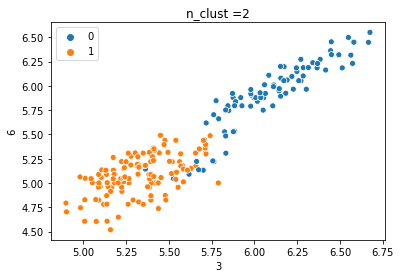

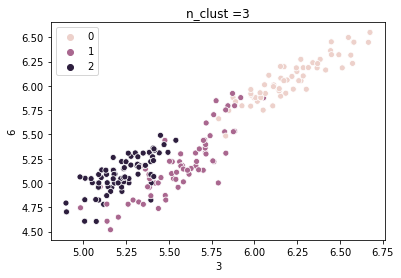

In [9]:
best_k = [2,3]
for k in best_k:

    best = KMeans(n_clusters = k, random_state = rnd_state)
    best.fit_predict(X)
    y_km = best.labels_
    
    plt.title('n_clust =' + str(k))
    sns.scatterplot(X[3],X[6],hue = y_km);
    plt.show()

The results for k = 3 visually look better, this considering the selected attributes only.

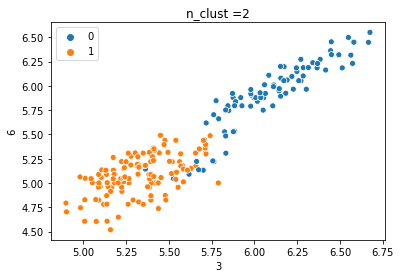

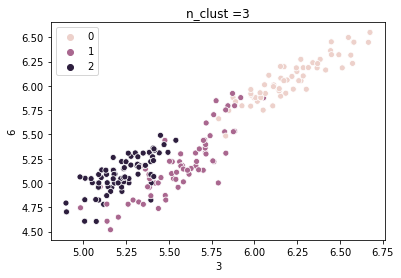

In [10]:
k_candidates  = [2,3]

for k in k_candidates:

    best = KMeans(n_clusters = k, random_state = rnd_state)
    best.fit_predict(X)
    y_km = best.labels_
    
    plt.title('n_clust =' + str(k))
    sns.scatterplot(X[3],X[6],hue = y_km);
    plt.show()

### 3. The best k is choosen by visual inspection

In [11]:
best_k = 3

best = KMeans(n_clusters = best_k, random_state = rnd_state)
best.fit_predict(X)
y_km = best.labels_

### 4. Use of max_diag function
The confusion matrix for the clustering result vs actual labels is computed.  
Sorting the matrix with max_diag is useful to avoid coding discrepancies for the cluster labels.

In [12]:
cm_km = max_diag(confusion_matrix(y,y_km))
print('Confusion matrix for k =',best_k)
print(cm_km)

Confusion matrix for k = 3
[[60.  1.  9.]
 [10. 60.  0.]
 [ 2.  0. 68.]]


### 5. The accuracy of the best scheme is computed
The schema accuracy is computed as follows:  

compute the accuracy a_km of y_km versus y  
as the ratio the sum of the main diagonal of cm_km and the number of samples in X

In [13]:
diag_sum = 0
for i in range(cm_km.shape[0]):
    diag_sum += cm_km[i,i]
a_km = diag_sum/len(X)
print('The computed accuracy of the schema is {:.2%}'.format(a_km))

The computed accuracy of the schema is 89.52%


### 6. Data is rescaled for further analisys
Unsipervised data in X is rescaled using sklearn.preprocessing.MinMaxScaler, producing the scaled dataset X_mms

In [14]:
X_scaler = MinMaxScaler()
X_scaler.fit(X)
X_mms = pd.DataFrame(X_scaler.transform(X))
X_mms.head()

,0,1,2,3,4,5,6
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994


### 7.The clustering task is repeated

- fit on the scaled data X_mms
- production of confusion matrix and reorder
- accuracy computing



In [16]:
best_k = 3

best = KMeans(n_clusters = best_k, random_state = rnd_state)
best.fit_predict(X_mms)
y_kmms = best.labels_

cm_kmms = max_diag(confusion_matrix(y,y_kmms))
print('Confusion matrix for k =',best_k)
print(cm_kmms)

diag_sum = 0
for i in range(cm_km.shape[0]):
    diag_sum += cm_kmms[i,i]
a_kmms = diag_sum/len(X)
print('The computed accuracy of the schema is {:.2%}'.format(a_kmms))


Confusion matrix for k = 3
[[58.  2. 10.]
 [ 8. 62.  0.]
 [ 3.  0. 67.]]
The computed accuracy of the schema is 89.05%
